# 4.10 Instacart Final Project

## Contents

### Import Libraries and Dataframes
### Create regional segmentation of data
### Determine whether there’s a difference in spending habits between the different U.S. regions
### Create an exclusion flag for low-activity customers
### Customer profiling
### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
### Compare customer profiles with regions and departments
### Visualizations

In [2]:
# import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r"C:\Users\anish\02-2025 Instacart Basket Analysis"

In [6]:
path

'C:\\Users\\anish\\02-2025 Instacart Basket Analysis'

In [8]:
df_ords_prods_customers_merge =pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customers_aggregated.pkl'))

# 3) Create a regional segmentation of the data

In [12]:
df_ords_prods_customers_merge.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [14]:
# Assign Northeast Region
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Maine', 'region'] = 'Northeast'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'New Hampshire', 'region'] = 'Northeast'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Vermont', 'region'] = 'Northeast'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Pennsylvania', 'region'] = 'Northeast'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Massachusetts', 'region'] = 'Northeast'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Rhode Island', 'region'] = 'Northeast'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Connecticut', 'region'] = 'Northeast'

In [16]:
# Assign Midwest Region
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Wisconsin', 'region'] = 'Midwest'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Michigan', 'region'] = 'Midwest'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Illinois', 'region'] = 'Midwest'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Indiana', 'region'] = 'Midwest'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Ohio', 'region'] = 'Midwest'

In [18]:
# Assign Midwest Region2
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'North Dakota', 'region'] = 'Midwest'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'South Dakota', 'region'] = 'Midwest'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Nebraska', 'region'] = 'Midwest'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Kansas', 'region'] = 'Midwest'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Minnesota', 'region'] = 'Midwest'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Iowa', 'region'] = 'Midwest'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Missouri', 'region'] = 'Midwest'

In [20]:
# Assign South Region
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Delaware', 'region'] = 'South'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Maryland', 'region'] = 'South'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'District of Columbia', 'region'] = 'South'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Virginia', 'region'] = 'South'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'West Virginia', 'region'] = 'South'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'North Carolina', 'region'] = 'South'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'South Carolina', 'region'] = 'South'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Georgia', 'region'] = 'South'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Florida', 'region'] = 'South'

In [22]:
# Assign South Region2
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Kentucky', 'region'] = 'South'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Tennessee', 'region'] = 'South'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Mississippi', 'region'] = 'South'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Alabama', 'region'] = 'South'

In [24]:
# Assign South Region3
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Oklahoma', 'region'] = 'South'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Texas', 'region'] = 'South'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Arkansas', 'region'] = 'South'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Louisiana', 'region'] = 'South'

In [26]:
# Assign West Region
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Idaho', 'region'] = 'West'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Montana', 'region'] = 'West'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Wyoming', 'region'] = 'West'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Nevada', 'region'] = 'West'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Utah', 'region'] = 'West'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Colorado', 'region'] = 'West'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Arizona', 'region'] = 'West'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'New Mexico', 'region'] = 'West'

In [28]:
# Assign West Region2
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Alaska', 'region'] = 'West'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Washington', 'region'] = 'West'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Oregon', 'region'] = 'West'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'California', 'region'] = 'West'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['state'] == 'Hawaii', 'region'] = 'West'

In [30]:
df_ords_prods_customers_merge.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South


## Determine whether there’s a difference in spending habits between the different U.S. regions

In [33]:
# Crosstab Region to spending flag
crosstab = pd.crosstab(df_ords_prods_customers_merge['region'], df_ords_prods_customers_merge['spending_flag'], dropna = False)

In [35]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155979,7441606
Northeast,87502,4371727
South,209693,10582607
West,160354,8132863
NaN,20724,1242986


In [53]:
# Remove the row where the index (region) is NaN
crosstab = crosstab[crosstab.index.notna()]

# Show the cleaned crosstab
print(crosstab)


spending_flag  High spender  Low spender
region                                  
Midwest              155979      7441606
Northeast             87502      4371727
South                209693     10582607
West                 160354      8132863


In [56]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155979,7441606
Northeast,87502,4371727
South,209693,10582607
West,160354,8132863


In [60]:
df_ords_prods_customers_merge.to_pickle(os.path.join(path, 'Data','Prepared Data', 'orders_products_customers_aggregated.pkl'))

# 4.  Create an exclusion flag for low-activity customers (customers with < 5 orders) and exclude them from the data

In [63]:
# Create a flag for customers with less than 5 orders
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [65]:
df_ords_prods_customers_merge['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30965686
low-activity customer      1440355
Name: count, dtype: int64

In [67]:
# Exclude low-activity customers from the dataframe
df_excluded = df_ords_prods_customers_merge[df_ords_prods_customers_merge['activity_flag'] != 'low-activity customer']

In [71]:
df_excluded.to_pickle(os.path.join(path, 'Data','Prepared Data', 'low_activity_excluded.pkl'))

# 5-6) Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. Create an appropriate visualization to show the distribution of profiles.

### Income

In [75]:
# Create an income group variable
df_excluded.loc[df_excluded['income'] <= 55000, 'income_group'] = 'low-income'
df_excluded.loc[(df_excluded['income'] > 55000) & (df_excluded['income'] <= 150000), 'income_group'] = 'middle-income'
df_excluded.loc[df_excluded['income'] > 150000, 'income_group'] = 'high-income'

C:\Users\anish\AppData\Local\Temp\ipykernel_18512\1030381792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['income'] <= 55000, 'income_group'] = 'low-income'


In [77]:
df_excluded['income_group'].value_counts(dropna = False)

income_group
middle-income    22618468
low-income        4452560
high-income       3894658
Name: count, dtype: int64

### Bar Chart

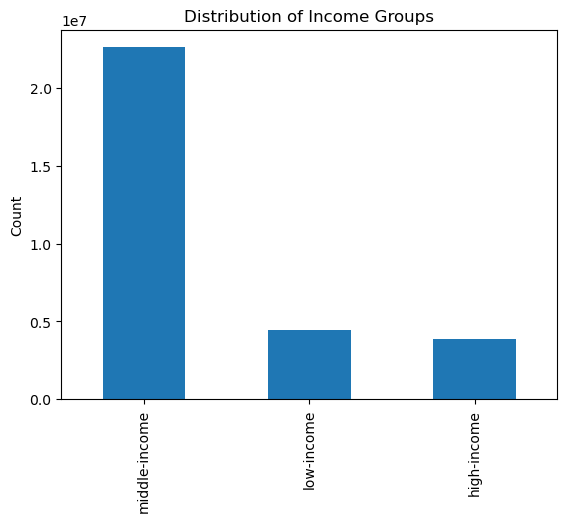

In [80]:
income_group_counts = df_excluded['income_group'].value_counts(dropna=False)
income_group_distribution_bar = income_group_counts.plot.bar()  
plt.title('Distribution of Income Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [84]:
income_group_distribution_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_distribution_bar_chart.png'))

### Age

In [87]:
# Create an age group variable
df_excluded.loc[df_excluded['age'] <= 25, 'age_group'] = 'young adult'
df_excluded.loc[(df_excluded['age'] > 25) & (df_excluded['age'] <= 44), 'age_group'] = 'adult'
df_excluded.loc[(df_excluded['age'] > 44) & (df_excluded['age'] <= 64), 'age_group'] = 'middle-aged'
df_excluded.loc[df_excluded['age'] > 64, 'age_group'] = 'senior'

C:\Users\anish\AppData\Local\Temp\ipykernel_18512\2854730798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['age'] <= 25, 'age_group'] = 'young adult'


In [89]:
age_group_counts = df_excluded['age_group'].value_counts(dropna = False)
age_group_counts

age_group
middle-aged    9690405
adult          9214810
senior         8195806
young adult    3864665
Name: count, dtype: int64

### Pie Chart

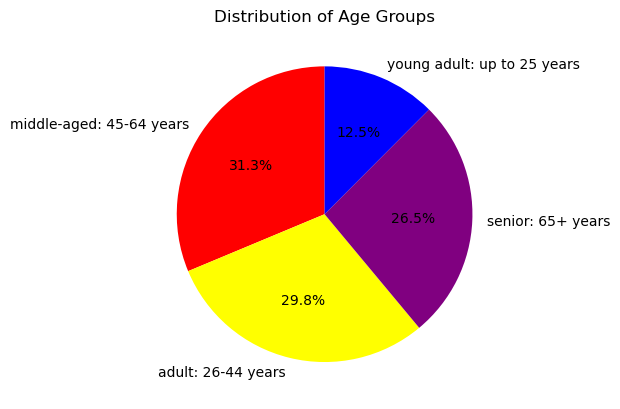

In [92]:
age_group_distribution_pie = age_group_counts.plot.pie(autopct='%1.1f%%', labels= ['middle-aged: 45-64 years', 'adult: 26-44 years', 'senior: 65+ years', 'young adult: up to 25 years'], startangle=90, colors=['red','yellow','purple','blue'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Age Groups')
plt.show()

In [94]:
age_group_distribution_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_group_distribution_pie.png'))

### Dependants

In [99]:
# Create a dependents flag
df_excluded.loc[df_excluded['number_of_dependants'] == 0, 'dependants_flag'] = 'no dependants'
df_excluded.loc[df_excluded['number_of_dependants'] >= 1, 'dependants_flag'] = 'has dependants'

C:\Users\anish\AppData\Local\Temp\ipykernel_18512\1372734912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['number_of_dependants'] == 0, 'dependants_flag'] = 'no dependants'


In [101]:
dependant_counts = df_excluded['dependants_flag'].value_counts(dropna = False)
dependant_counts

dependants_flag
has dependants    23225670
no dependants      7740016
Name: count, dtype: int64

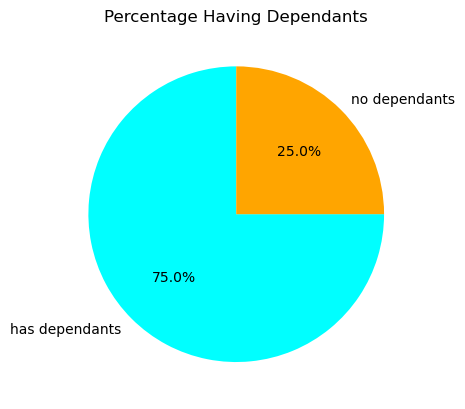

In [103]:
dependants_pie_chart = dependant_counts.plot.pie(autopct='%1.1f%%', labels= ['has dependants', 'no dependants'], startangle=90, colors=['cyan','orange'])
plt.ylabel('')  # Hide the y-label
plt.title('Percentage Having Dependants')
plt.show()

In [105]:
dependants_pie_chart.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dependants_pie_chart.png'))

In [109]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, 'Data','Prepared Data', 'low_activity_excluded.pkl'))

In [111]:
# import dataframe
df_excluded = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'low_activity_excluded.pkl'))

## Loyalty vs Age Group

In [114]:
loyalty_age_cross = pd.crosstab(df_excluded['loyalty_flag'], df_excluded['age_group'], dropna = False)
loyalty_age_cross

age_group,adult,middle-aged,senior,young adult
loyalty_flag,,,,
Loyal customer,3048291,3231607,2724001,1280497
New customer,1420565,1506750,1276701,599879
Regular customer,4745954,4952048,4195104,1984289


### Bar Chart

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

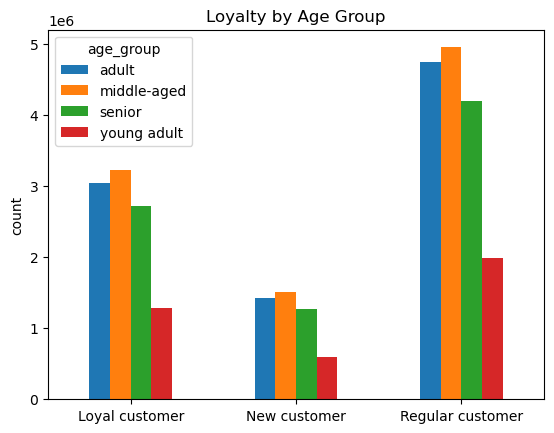

In [117]:
loyalty_age_bar = loyalty_age_cross.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [119]:
loyalty_age_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_age_group_bar_chart.png'))

## Spending vs Age Group

In [124]:
spending_age_cross = pd.crosstab(df_excluded['spending_flag'], df_excluded['age_group'], dropna = False)
spending_age_cross

age_group,adult,middle-aged,senior,young adult
spending_flag,,,,
High spender,174740,197799,156889,74004
Low spender,9040070,9492606,8038917,3790661


### Bar Chart

(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

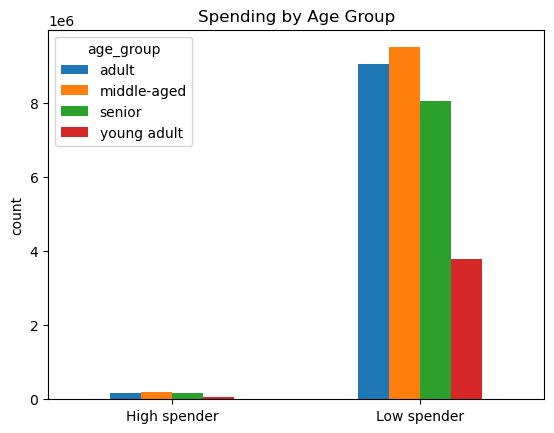

In [127]:
spending_age_bar = spending_age_cross.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [129]:
spending_age_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'spending_age_group_bar_chart.png'))

## Regional Spending with low activity customers excluded

In [132]:
df_excluded.loc[df_excluded['state'] == 'Pennsylvania', 'region'] = 'Northeast'

In [136]:
region_spending_cross = pd.crosstab(df_excluded['region'], df_excluded['spending_flag'], dropna = False)

In [138]:
region_spending_cross

spending_flag,High spender,Low spender
region,,
Midwest,148682,7113081
Northeast,83778,4176269
South,199341,10112190
West,152288,7775225
NaN,19343,1185489


In [140]:
region_spending_cross = crosstab[crosstab.index.notna()]

In [142]:
region_spending_cross

spending_flag,High spender,Low spender
region,,
Midwest,155979,7441606
Northeast,87502,4371727
South,209693,10582607
West,160354,8132863


### Bar Chart

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

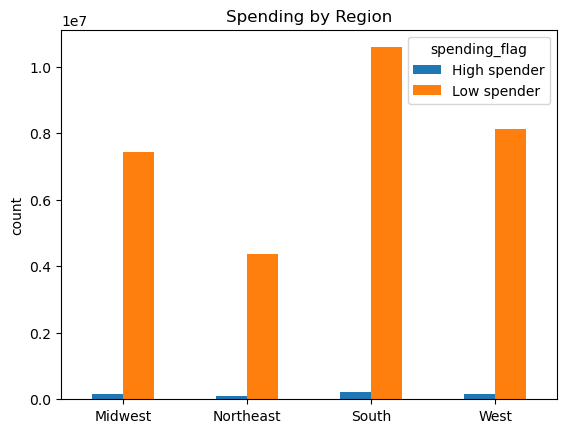

In [145]:
region_spending_bar = region_spending_cross.plot.bar()
plt.title('Spending by Region')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [147]:
region_spending_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_spending_bar_chart.png'))

## Department

In [150]:
dept = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'))

In [152]:
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [154]:
df_excluded.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'orders_hour', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependants', 'marital_status',
       'income', '_merge', 'region', 'activity_flag', 'income_group',
       'age_group', 'dependants_flag'],
      dtype='object')

In [156]:
df_excluded.drop(columns = ['_merge'])

,order_id,user_id,order_number,orders_day_of_week,orders_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag,income_group,age_group,dependants_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,high-activity customer,low-income,adult,has dependants
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,31,2/17/2019,3,married,40423,South,high-activity customer,low-income,adult,has dependants
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,31,2/17/2019,3,married,40423,South,high-activity customer,low-income,adult,has dependants
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,31,2/17/2019,3,married,40423,South,high-activity customer,low-income,adult,has dependants
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,31,2/17/2019,3,married,40423,South,high-activity customer,low-income,adult,has dependants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32406036,2977660,206209,13,1,12,7.0,14197,5,1,Tomato Paste,...,74,9/14/2019,3,married,137969,Midwest,high-activity customer,middle-income,senior,has dependants
32406037,2977660,206209,13,1,12,7.0,38730,6,0,Brownie Crunch High Protein Bar,...,74,9/14/2019,3,married,137969,Midwest,high-activity customer,middle-income,senior,has dependants
32406038,2977660,206209,13,1,12,7.0,31477,7,0,High Protein Bar Chunky Peanut Butter,...,74,9/14/2019,3,married,137969,Midwest,high-activity customer,middle-income,senior,has dependants
32406039,2977660,206209,13,1,12,7.0,6567,8,0,Chocolate Peanut Butter Protein Bar,...,74,9/14/2019,3,married,137969,Midwest,high-activity customer,middle-income,senior,has dependants


In [168]:
for col in df_excluded.columns:
    if df_excluded[col].dtype == 'int64':
        df_excluded[col] = pd.to_numeric(df_excluded[col], downcast='integer')

only way I was able to not get a memory error is by doing this ^

In [170]:
df_final_merged = df_excluded.merge(dept, on='department_id', indicator='created')

In [173]:
df_final_merged.to_pickle(os.path.join(path,'Data','Prepared Data','orders_products_customers_departments.pkl'))

### Bar Chart

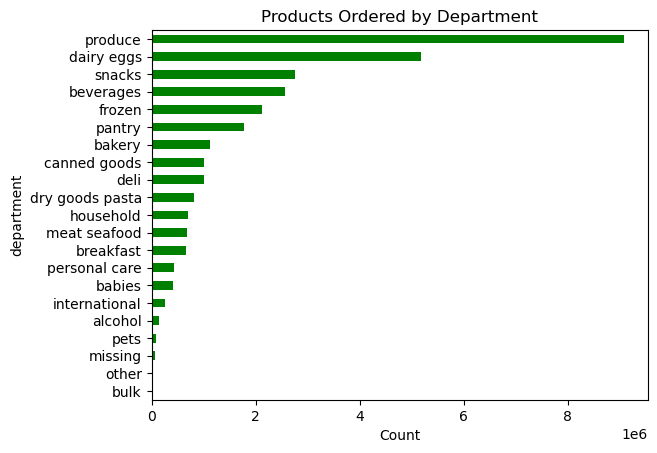

In [175]:
dept_bar = df_final_merged['department'].value_counts(ascending=True).plot(kind='barh', color='green', xlabel = 'Count', title='Products Ordered by Department')

In [179]:
dept_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dept_bar_chart.png'))

## Age vs Department

In [182]:
age_dept_cross = pd.crosstab(df_final_merged['age_group'], df_final_merged['department'], dropna = False)
age_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
adult,42170,123044,334154,754851,199138,9902,302479,1549127,299970,243702,...,207553,76675,199124,19130,10198,529307,125543,27034,2712590,824677
middle-aged,46592,129910,350804,814687,211603,10298,315774,1612490,314110,256920,...,218860,79743,209927,20340,10811,558929,134748,28293,2830853,867564
senior,36720,106204,295997,684020,175518,8945,267509,1368072,265199,217316,...,186630,67199,181150,16915,8946,472383,111065,25115,2408104,728549
young adult,19192,51234,139873,318343,85613,4306,126312,647493,124555,104198,...,86814,32374,84580,8383,4456,222086,53003,12618,1127726,345616


### Bar Chart

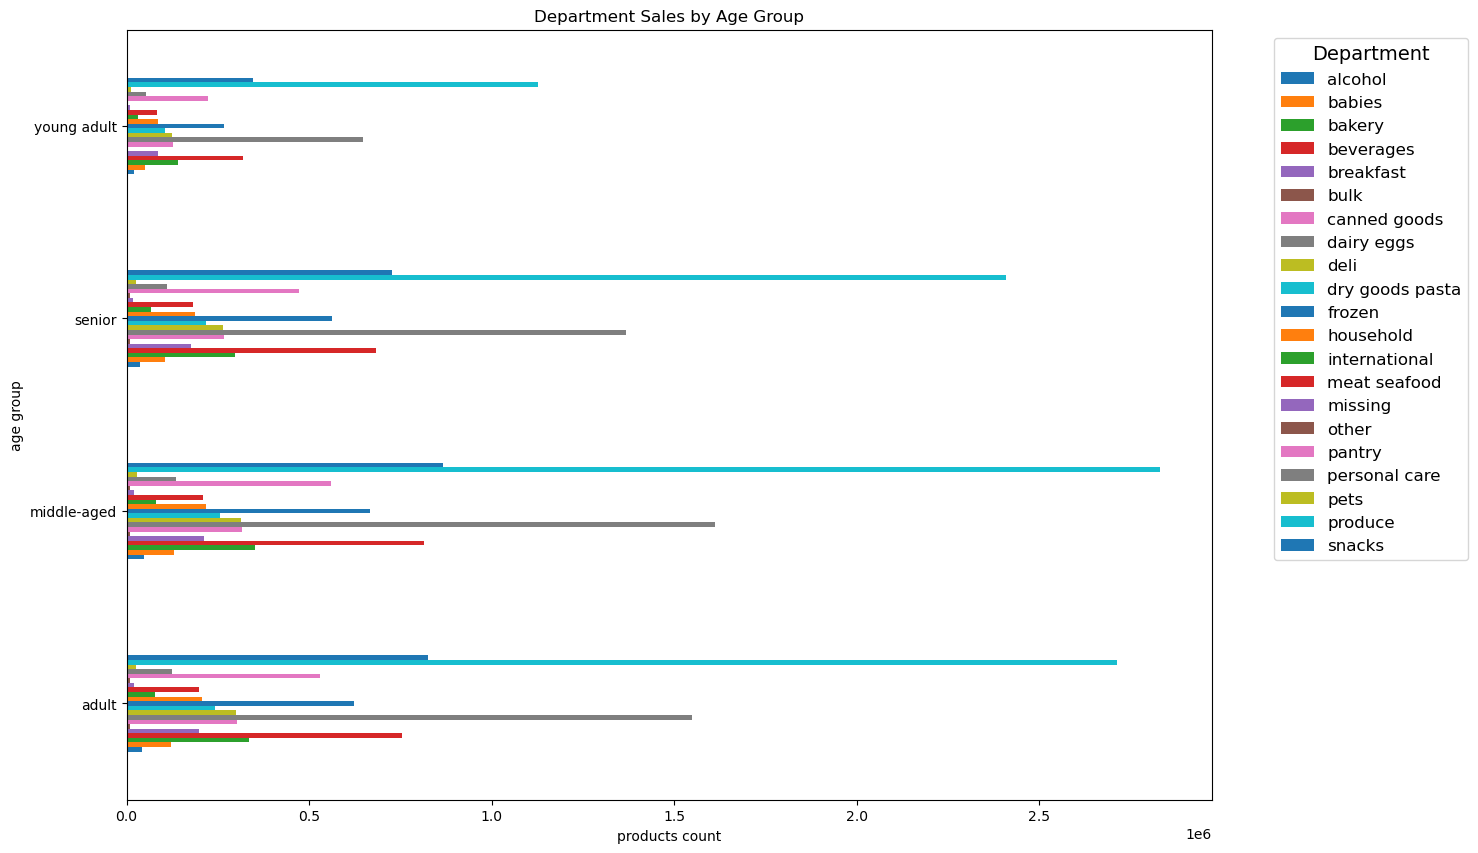

In [185]:
age_dept_bar = age_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Age Group')
plt.xlabel('products count')
plt.ylabel('age group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [187]:
age_dept_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_dept_bar_chart.png'))

## Income vs Department

In [190]:
income_dept_cross = pd.crosstab(df_final_merged['income_group'], df_final_merged['department'], dropna = False)
income_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
high-income,24081,53001,148430,313325,83519,3671,132389,659149,125886,106335,...,92674,32822,91514,8253,4554,231915,53539,12991,1134490,305779
low-income,22202,43438,144086,479742,116700,5974,112945,680816,141758,92401,...,111508,30240,54717,8902,4958,226221,62897,11782,1139552,673753
middle-income,98391,313953,828312,1778834,471653,23806,766740,3837217,736190,623400,...,495675,192929,528550,47613,24899,1324569,307923,68287,6805231,1786874


### Bar Chart

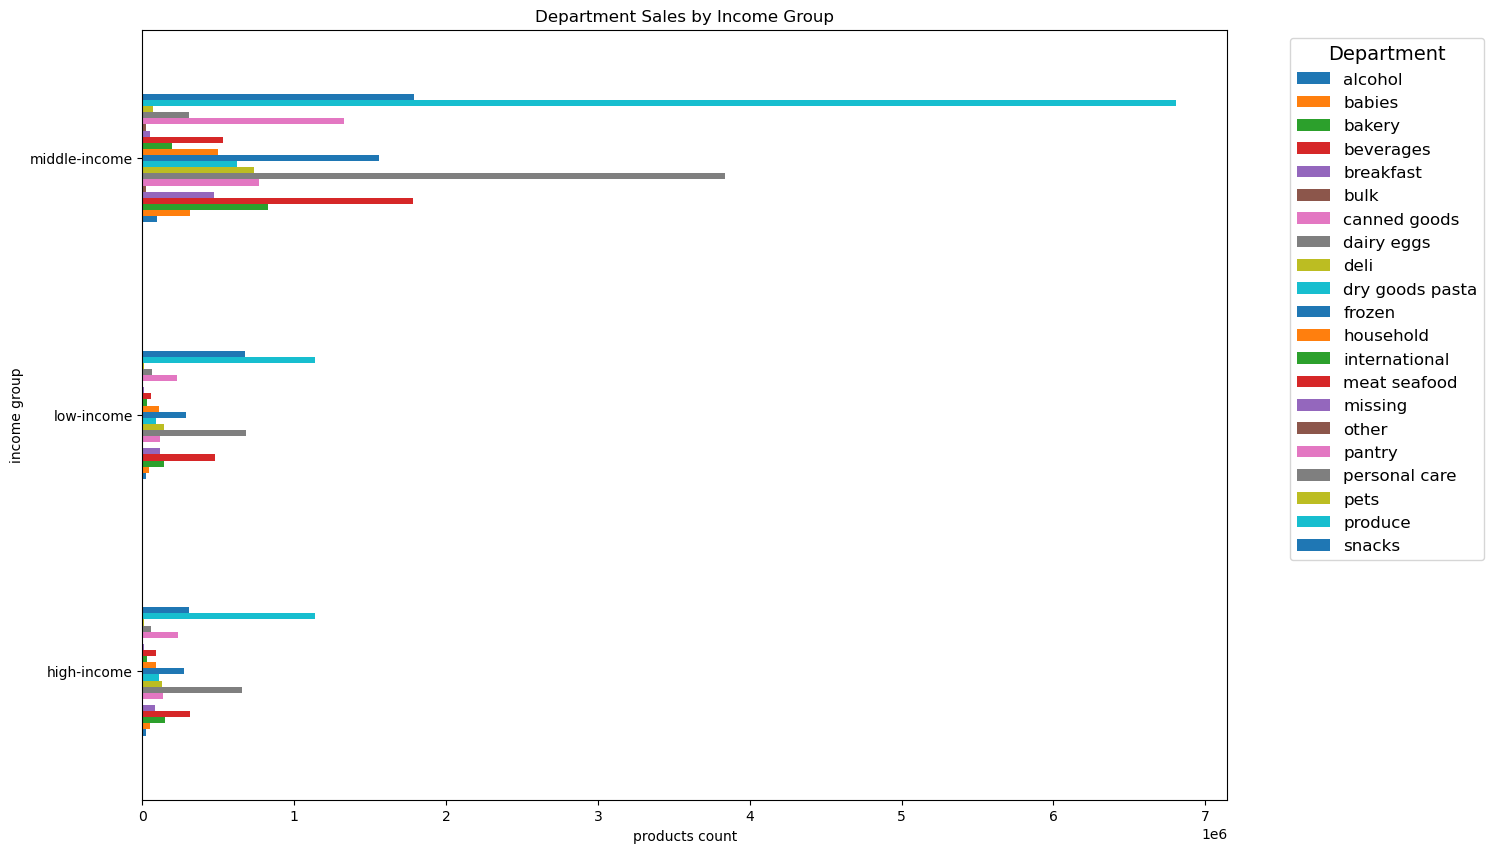

In [192]:
income_dept_bar = income_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Income Group')
plt.xlabel('products count')
plt.ylabel('income group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [195]:
income_dept_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_dept_bar_chart.png'))

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [208]:
# subset
customer_profile = df_final_merged.groupby(['user_id', 'gender', 'state', 'region', 'number_of_dependants', 'marital_status', 'age_group', 'order_number', 'orders_day_of_week', 'orders_hour', 'loyalty_flag','dependants_flag', 'income_group', 'spending_flag'])['prices'].sum().reset_index()

In [210]:
customer_profile.head()

,user_id,gender,state,region,number_of_dependants,marital_status,age_group,order_number,orders_day_of_week,orders_hour,loyalty_flag,dependants_flag,income_group,spending_flag,prices
0,1,Female,Alabama,South,3,married,adult,1,2,8,New customer,has dependants,low-income,Low spender,31.6
1,1,Female,Alabama,South,3,married,adult,2,3,7,New customer,has dependants,low-income,Low spender,35.4
2,1,Female,Alabama,South,3,married,adult,3,3,12,New customer,has dependants,low-income,Low spender,28.2
3,1,Female,Alabama,South,3,married,adult,4,4,7,New customer,has dependants,low-income,Low spender,26.0
4,1,Female,Alabama,South,3,married,adult,5,4,15,New customer,has dependants,low-income,Low spender,57.0


In [212]:
customer_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [214]:
customer_agg

order_number           prices                   
                 max min  mean    max    min        mean
user_id                                                 
1                 10   1   5.5   63.1   25.0   37.570000
2                 14   1   7.5  213.1   19.0  104.685714
3                 12   1   6.5  107.2   30.7   60.116667
4                  5   1   3.0   63.4   10.8   29.540000
7                 20   1  10.5  166.7    6.3   76.910000
...              ...  ..   ...    ...    ...         ...
206203             5   1   3.0  216.3  126.6  169.900000
206206            67   1  34.0  157.3    9.6   32.526866
206207            16   1   8.5  200.8   42.8  101.931250
206208            49   1  25.0  238.5   38.7  115.595918
206209            13   1   7.0  131.5   11.1   70.046154

[156301 rows x 6 columns]

In [216]:
freq_agg = df_excluded.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [218]:
freq_agg

order_number                days_since_prior_order                 
                 max min       mean                    max   min       mean
user_id                                                                    
1                 10   1   5.813559                   30.0   0.0  20.259259
2                 14   1   8.035897                   30.0   3.0  15.967033
3                 12   1   6.000000                   21.0   7.0  11.487179
4                  5   1   2.888889                   21.0   0.0  15.357143
7                 20   1   9.645631                   30.0   2.0  13.546392
...              ...  ..        ...                    ...   ...        ...
206203             5   1   2.983193                   30.0  27.0  29.103093
206206            67   1  38.007018                   15.0   0.0   4.042705
206207            16   1   8.116592                   30.0   1.0  14.879397
206208            49   1  25.505170                   20.0   0.0   7.442105
206209            13   1   6.937984                   30.0   3.0  20.275862

[162631 rows x 6 columns]

# 8. Compare customer profiles with regions and departments

In [225]:
region_dept_cross = pd.crosstab(df_final_merged['region'], df_final_merged['department'])

In [227]:
region_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34052,95741,261753,598979,156383,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100411,21358,2134115,645143
Northeast,20136,56872,155882,364615,92558,4471,137738,711976,139808,111939,...,96810,35265,91595,8970,4926,244582,58670,13150,1239418,384202
South,48822,139511,371620,859419,223534,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142517,29909,3027476,916780
West,36766,102428,288155,650574,173881,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106659,24059,2324678,711329


### Bar Chart

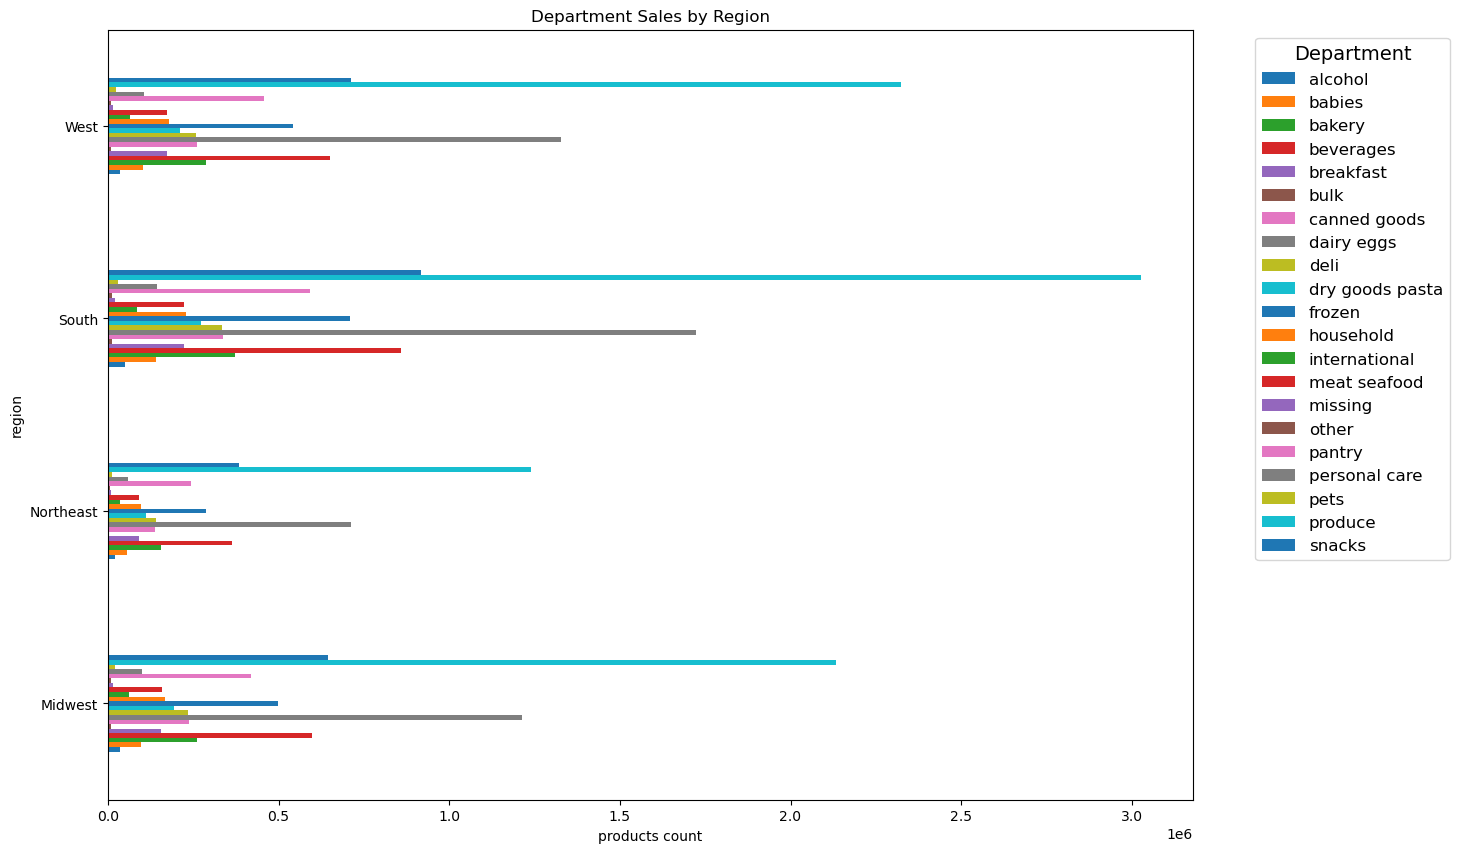

In [229]:
region_dept_bar = region_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [232]:
region_dept_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_dept_bar_chart.png'))

In [234]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customers_departments.pkl'))

### Bar Chart

Text(0.5, 0, '')

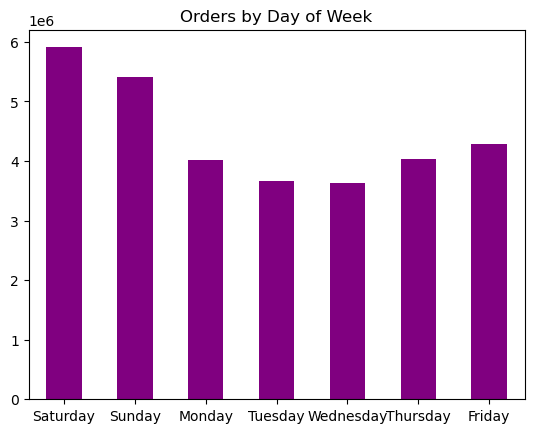

In [239]:
orders_dow_bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'purple')
orders_dow_bar.set_title('Orders by Day of Week')
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
orders_dow_bar.set_xlabel("")

In [241]:
orders_dow_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'orders_dow_bar_chart.png'))

### Histogram

Text(0.5, 0, 'Hour of Day (24 hr clock)')

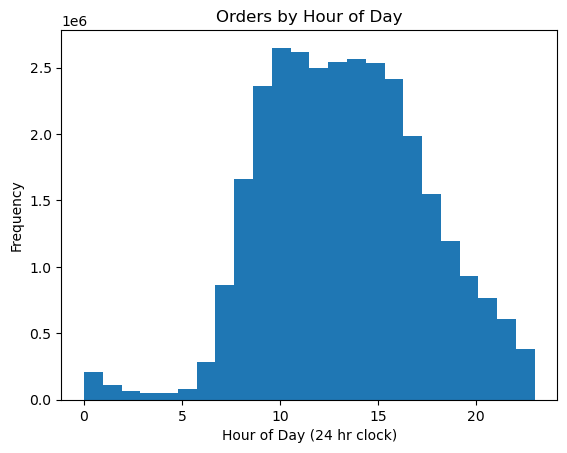

In [248]:
orders_hour_hist=df['orders_hour'].plot.hist(bins = 24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day (24 hr clock)')

In [252]:
orders_hour_hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'orders_hour_histogram.png'))

## Multiple Bar Charts

In [257]:
loyalty_income_cross = pd.crosstab(df['loyalty_flag'], df['income_group'], dropna = False)
loyalty_income_cross

income_group,high-income,low-income,middle-income
loyalty_flag,,,
Loyal customer,1310977,1381497,7591922
New customer,575289,798846,3429760
Regular customer,2008392,2272217,11596786


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

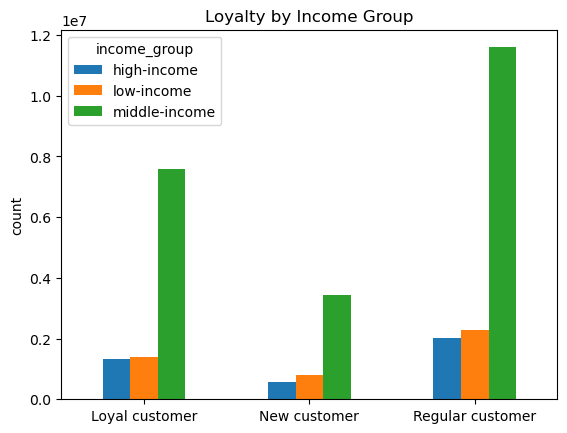

In [259]:
loyalty_income_bar = loyalty_income_cross.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [261]:
loyalty_income_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_income_group_bar_chart.png'))

In [265]:
loyalty_spender_cross = pd.crosstab(df['loyalty_flag'], df['spending_flag'], dropna = False)
loyalty_spender_cross

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216601,10067795
New customer,84012,4719883
Regular customer,302819,15574576


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

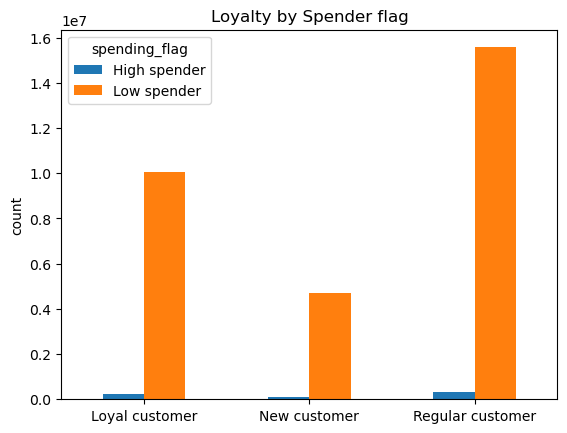

In [267]:
loyalty_spender_bar = loyalty_spender_cross.plot.bar()
plt.title('Loyalty by Spender flag')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [269]:
loyalty_spender_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_spender_bar_chart.png'))

In [273]:
loyalty_fam_cross = pd.crosstab(df['loyalty_flag'], df['marital_status'], dropna = False)
loyalty_fam_cross

marital_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,882752,492763,7202671,1706210
New customer,403804,221785,3380787,797519
Regular customer,1358815,766660,11161004,2590916


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

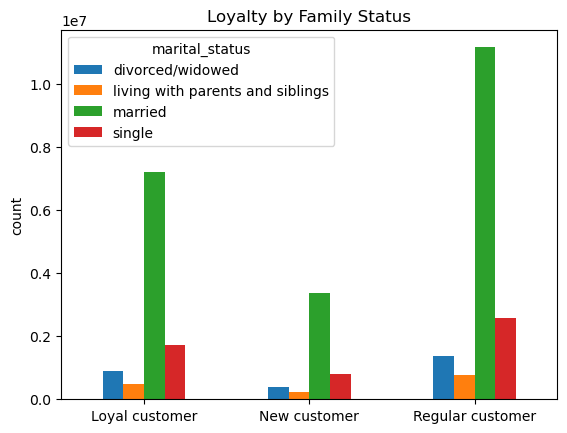

In [275]:
loyalty_fam_bar = loyalty_fam_cross.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [277]:
loyalty_fam_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_fam_bar_chart.png'))

In [279]:
loyalty_depend_cross = pd.crosstab(df['loyalty_flag'], df['dependants_flag'], dropna = False)
loyalty_depend_cross

dependants_flag,has dependants,no dependants
loyalty_flag,,
Loyal customer,7695434,2588962
New customer,3602572,1201323
Regular customer,11927664,3949731


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

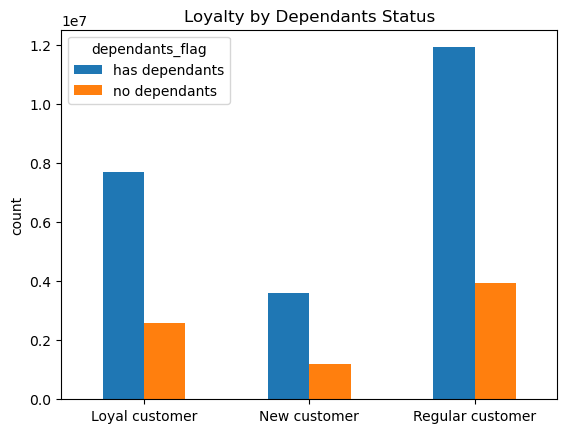

In [281]:
loyalty_depend_bar = loyalty_depend_cross.plot.bar()
plt.title('Loyalty by Dependants Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [283]:
loyalty_depend_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_depend_bar_chart.png'))

In [287]:
marital_status = df['marital_status'].value_counts(dropna = False)
marital_status

marital_status
married                             21744462
single                               5094645
divorced/widowed                     2645371
living with parents and siblings     1481208
Name: count, dtype: int64

### Pie Chart

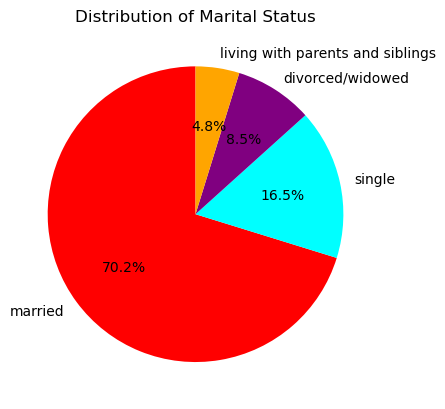

In [297]:
marital_status_distribution_pie = marital_status.plot.pie(autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], startangle=90, colors=['red','cyan','purple','orange'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Marital Status')
plt.show()

In [299]:
marital_status_distribution_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'marital_status_distribution_pie_chart.png'))